           Asset_1      Asset_2      Asset_3
count  2000.000000  2000.000000  2000.000000
mean      1.372255     0.919825     0.590935
std       0.453612     0.087558     0.147675
min       0.816194     0.720098     0.298757
25%       0.950933     0.870481     0.490721
50%       1.228658     0.913990     0.591200
75%       1.777283     0.969774     0.632133
max       2.381876     1.178840     0.995919


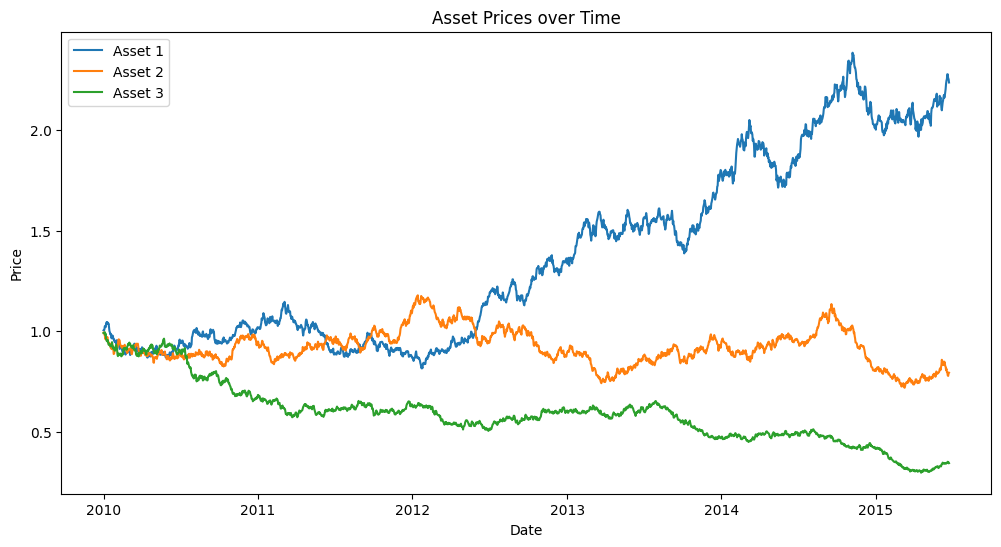

In [12]:
import seaborn as sns

# Load the dataset
data = pd.read_csv('dynamic_rebalancing_strategy.csv', parse_dates=['Date'], index_col='Date')

# Summary statistics
print(data.describe())

# Plot the price of assets
plt.figure(figsize=(12, 6))
plt.plot(data['Asset_1'], label='Asset 1')
plt.plot(data['Asset_2'], label='Asset 2')
plt.plot(data['Asset_3'], label='Asset 3')
plt.title('Asset Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



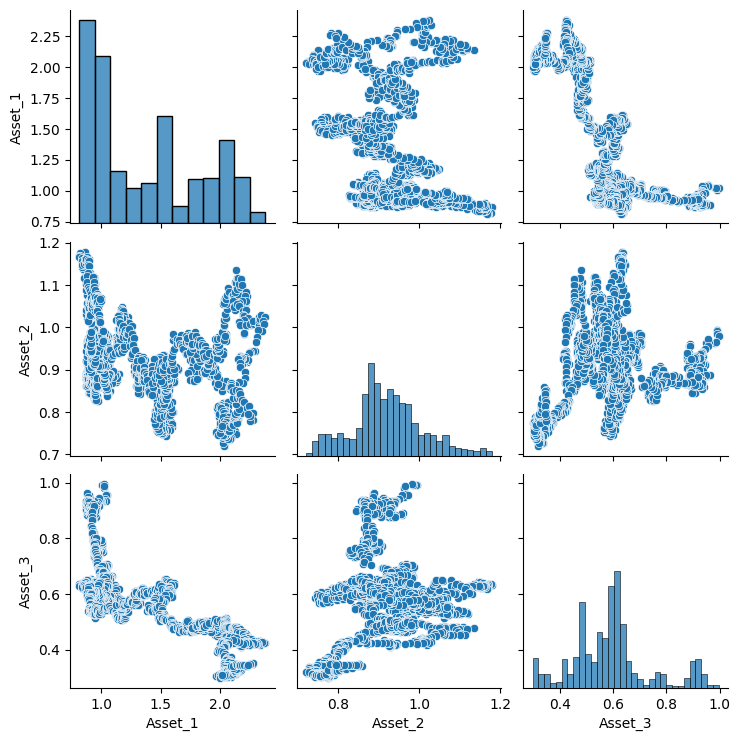

In [13]:
# Pairplot
sns.pairplot(data)
plt.show()


Generation 0: Best Fitness = 0.026872025367060258
Generation 1: Best Fitness = 0.026872025367060258
Generation 2: Best Fitness = 0.026872025367060258
Generation 3: Best Fitness = 0.026872025367060258
Generation 4: Best Fitness = 0.026872025367060258
Generation 5: Best Fitness = 0.026872025367060258
Generation 6: Best Fitness = 0.026872025367060258
Generation 7: Best Fitness = 0.026872025367060258
Generation 8: Best Fitness = 0.026872025367060258
Generation 9: Best Fitness = 0.026872025367060258
Generation 10: Best Fitness = 0.026872025367060258
Generation 11: Best Fitness = 0.026872025367060258
Generation 12: Best Fitness = 0.026872025367060258
Generation 13: Best Fitness = 0.026872025367060258
Generation 14: Best Fitness = 0.026872025367060258
Generation 15: Best Fitness = 0.026872025367060258
Generation 16: Best Fitness = 0.026872025367060258
Generation 17: Best Fitness = 0.026872025367060258
Generation 18: Best Fitness = 0.026872025367060258
Generation 19: Best Fitness = 0.026872025

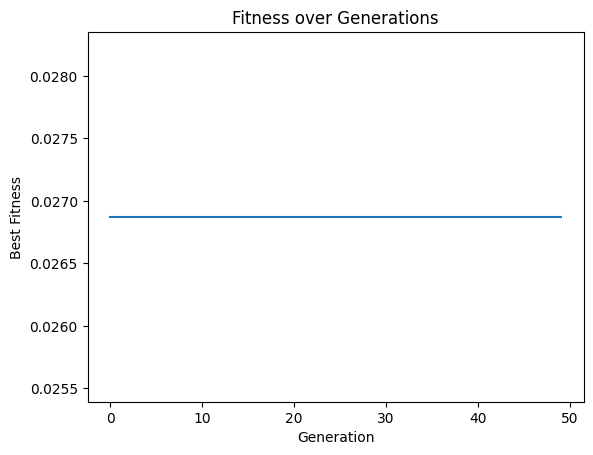

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('dynamic_rebalancing_strategy.csv', parse_dates=['Date'], index_col='Date')

# Fitness function: We will use a simple rebalancing strategy to define the fitness
def fitness(individual, data):
    weights = np.array(individual) / np.sum(individual)
    portfolio_returns = (data.pct_change().dropna() * weights).sum(axis=1)
    return portfolio_returns.mean() / portfolio_returns.std()

# Population initialization
def initialize_population(pop_size, n_assets):
    population = []
    for _ in range(pop_size):
        individual = np.random.rand(n_assets)
        population.append(individual)
    return np.array(population)

# Selection
def selection(population, fitness_scores, num_parents):
    parents = population[np.argsort(fitness_scores)][-num_parents:]
    return parents

# Crossover
def crossover(parents, offspring_size):
    offspring = []
    crossover_point = np.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        offspring.append(np.concatenate((parents[parent1_idx, :crossover_point],
                                         parents[parent2_idx, crossover_point:])))
    return np.array(offspring)

# Mutation
def mutation(offspring, mutation_rate=0.01):
    for idx in range(offspring.shape[0]):
        for _ in range(int(mutation_rate * offspring.shape[1])):
            i = np.random.randint(0, offspring.shape[1])
            offspring[idx, i] = np.random.rand()
    return offspring

# Genetic Algorithm
def genetic_algorithm(data, pop_size, n_assets, num_generations, num_parents):
    population = initialize_population(pop_size, n_assets)
    best_outputs = []

    for generation in range(num_generations):
        fitness_scores = np.array([fitness(ind, data.copy()) for ind in population])
        best_outputs.append(np.max(fitness_scores))

        parents = selection(population, fitness_scores, num_parents)
        offspring_crossover = crossover(parents, (pop_size - parents.shape[0], n_assets))
        offspring_mutation = mutation(offspring_crossover)

        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = offspring_mutation

        print(f'Generation {generation}: Best Fitness = {best_outputs[-1]}')

    return population, best_outputs

# Parameters
pop_size = 20
n_assets = data.shape[1]
num_generations = 50
num_parents = 10

# Run the genetic algorithm
population, best_outputs = genetic_algorithm(data, pop_size, n_assets, num_generations, num_parents)

# Plot the fitness over generations
plt.plot(best_outputs)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Fitness over Generations')
plt.show()
